# Science Foundation Ireland (SFI)

### The two datasets show research projects funded by SFI during the years.


Source:

https://data.gov.ie/dataset/science-foundation-ireland-grant-commitments


https://data.gov.ie/dataset/sfi-gender-dashboard-2019


### Dataset 1 - Science Foundation Ireland Grant Commitments

Data dictionary - https://www.sfi.ie/about-us/governance/open-data/Science-Foundation-Ireland-Grant-Commitments-Metadata.pdf

### Dataset 2 - SFI Gender Dashboard 2019

Data dictionary - http://www.sfi.ie/about-us/women-in-science/gender/SFI-Gender-Dashboard-Data-Summary.pdf

In [1]:
# Importing datasets
sfi.grants <- read.csv('./data/Open-Data-Final.csv')
sfi.grants.gender <- read.csv('./data/SFIGenderDashboard_TableauPublic_2019.csv')

# Checking Grant Commitments dataset
head(sfi.grants)

,Proposal.ID,Programme.Name,Sub.programme.Name,Supplement,Lead.Applicant,ORCID,Research.Body,Funder.Name,Crossref.Funder.Registry.ID,Proposal.Title,Start.Date,End.Date,Revised.Total.Commitment
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
1,00/PI.1/B038,SFI Principal Investigator Programme,,,Seamus Martin,https://orcid.org/0000-0002-8539-3143,Trinity College Dublin (TCD),Science Foundation Ireland,10.13039/501100001602,Establishing functional proteomic maps of proteins involved in apoptosis,01/10/2001,04/03/2007,5471668
2,00/PI.1/B045,SFI Principal Investigator Programme,,,Kingston Mills,https://orcid.org/0000-0003-3646-8222,Trinity College Dublin (TCD),Science Foundation Ireland,10.13039/501100001602,Pathogen-derived immunomodulatory molecules: future immunotherapeutics and vaccines,01/10/2001,04/12/2006,8069352
3,00/PI.1/B052,SFI Principal Investigator Programme,,,Kenneth Wolfe,https://orcid.org/0000-0003-4992-4979,Trinity College Dublin (TCD),Science Foundation Ireland,10.13039/501100001602,Functional Organisation of Eukaryotic Genomes,01/10/2001,04/12/2006,5632098
4,00/PI.1/C017,SFI Principal Investigator Programme,,,John Lewis,,Technological University Dublin (TU Dublin),Science Foundation Ireland,10.13039/501100001602,Measurement-Based Resource Management in Communication Networks.,01/12/2001,05/11/2006,2993355
5,00/PI.1/C028,SFI Principal Investigator Programme,,,John Pethica,,Trinity College Dublin (TCD),Science Foundation Ireland,10.13039/501100001602,Nanostructures and Molecule Mechanics.,01/12/2001,04/05/2007,7567189
6,00/PI.1/C042,SFI Principal Investigator Programme,,,Igor Shvets,https://orcid.org/0000-0001-7451-5435,Trinity College Dublin (TCD),Science Foundation Ireland,10.13039/501100001602,Studies of Surfaces and Interfaces of Magnetic Spinel Oxides.,01/12/2001,05/11/2006,7785757


In [2]:
# Checking SFI Gender dataset

head(sfi.grants.gender)

,Programme.Name,Year,Award.Status,Applicant.Gender,Amount.Requested,Amount.funded
,<chr>,<int>,<chr>,<chr>,<int>,<int>
1,SFI Investigator Programme / Principal Investigator Programme,2016,Declined,Male,480000,NA
2,SFI Investigator Programme / Principal Investigator Programme,2014,Declined,Female,790000,NA
3,SFI Investigator Project Award,2012,Declined,Female,200000,NA
4,SFI Starting Investigator Research Grant,2018,Declined,Female,400000,NA
5,SFI Investigator Programme / Principal Investigator Programme,2013,Declined,Male,580000,NA
6,SFI Starting Investigator Research Grant,2015,Declined,Female,400000,NA


In [3]:
# Cleaning data

require(dplyr)

sfi.new.grants <- sfi.grants

# Because we are going to analyze new grants from the SFI...
# There are a few grants from funding partners and a few splitting of awards where an award
# was transferred from one institution to another.
# Removing those
sfi.new.grants <- sfi.new.grants[-grep("(N)", sfi.grants$Proposal.ID, fixed = T),]
sfi.new.grants <- sfi.new.grants[-grep("(X)", sfi.grants$Proposal.ID, fixed = T),]
sfi.new.grants <- sfi.new.grants[-grep("(T)", sfi.grants$Proposal.ID, fixed = T),]

# Total of rows from Partners Funds and Splittings - 68
nrow(sfi.grants) - nrow(sfi.new.grants)

# There are 11 "negatives" or 0 grants which will interfere in the analysis
# Decided to remove those (only one will be transform to absolute value)
negatives <- sfi.new.grants %>% filter(Revised.Total.Commitment < 10)

# Remove all negative grants
sfi.new.grants$Revised.Total.Commitment <- abs(sfi.new.grants$Revised.Total.Commitment)
sfi.new.grants <- sfi.new.grants[sfi.new.grants$Revised.Total.Commitment > 10,]


allMissing <- is.na(sfi.new.grants)
#get a count for each column
counts <- colSums(allMissing)
counts

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




[1] 68

Proposal.ID              Programme.Name 
                          0                           0 
         Sub.programme.Name                  Supplement 
                          0                           0 
             Lead.Applicant                       ORCID 
                          0                           0 
              Research.Body                 Funder.Name 
                          0                           0 
Crossref.Funder.Registry.ID              Proposal.Title 
                          0                           0 
                 Start.Date                    End.Date 
                          0                           0 
   Revised.Total.Commitment 
                          0

## Data Exploration

### Dataset 1 - Science Foundation Ireland Grant Commitments

In [4]:
library(Hmisc)
library(psych, warn.conflicts = FALSE)

Hmisc::describe(sfi.new.grants)

Loading required package: lattice

Loading required package: survival

Loading required package: Formula

Loading required package: ggplot2


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units




sfi.new.grants 

 13  Variables      5317  Observations
--------------------------------------------------------------------------------
Proposal.ID 
       n  missing distinct 
    5317        0     5317 

lowest : 00/PI.1/B038                 00/PI.1/B045                 00/PI.1/B045s1               00/PI.1/B052                 00/PI.1/C017                
highest: TRA/2010/20 TIDA Training 11 TRA/2010/8                   TRA/2011/15                  TRA/2011/19                  TRA/2011/33                 
--------------------------------------------------------------------------------
Programme.Name 
       n  missing distinct 
    5317        0       57 

lowest : BBSRC-SFI Joint Funding Programme                                China / Ireland Science & Technology Collaboration Research Fund EPSRC-SFI Centres for Doctoral Training (CDT) Partnership?       EPSRC-SFI Joint Funding of Research?                             EU Joint Programming Initiative                               

In [5]:
require(ggplot2)
require(scales)

# Grouping by Institutes and creating the sum, mean and total number of grants
by_institute <- sfi.new.grants %>% 
  group_by(Research.Body) %>% 
  summarise(total = sum(Revised.Total.Commitment),
            mean = mean(Revised.Total.Commitment),
            n= n()) %>% ungroup()

head(by_institute)

Loading required package: scales


Attaching package: ‘scales’


The following objects are masked from ‘package:psych’:

    alpha, rescale


`summarise()` ungrouping output (override with `.groups` argument)



Research.Body,total,mean,n
<chr>,<dbl>,<dbl>,<int>
Athlone Institute of Technology (AIT),1079214,215842.76,5
Atlantic Corridor,169000,33800.00,5
Baboro,10300,10300.00,1
Ballyhoura Development Ltd,31540,31540.00,1
Brigit's Garden,99335,33111.67,3
British Council Ireland,203906,25488.25,8


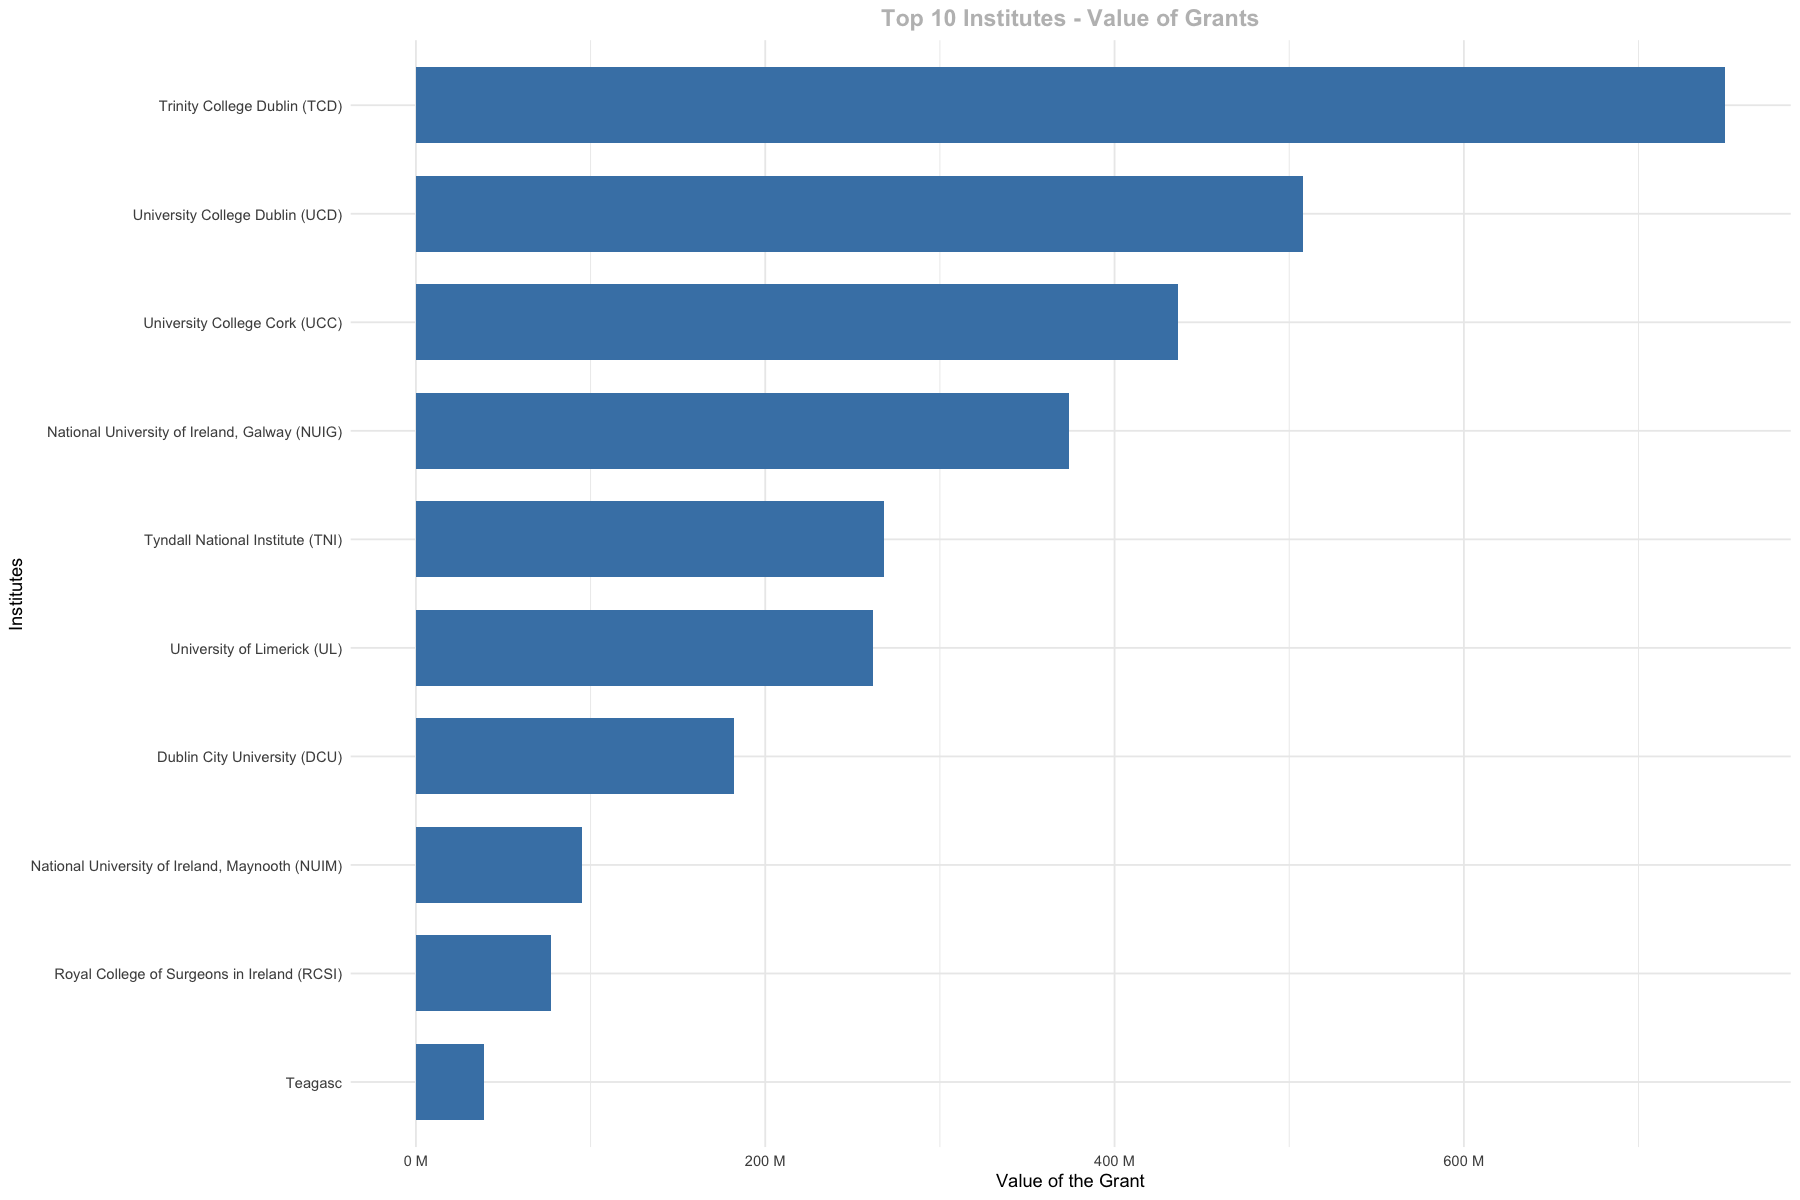

In [8]:
# Change the default plots size 
options(repr.plot.width=15, repr.plot.height=10)

# Plot the Top 10 Institutes which received the highest grants

top10.institutes.value <- by_institute %>% arrange(desc(total)) %>% head(10)

top10.institutes.value %>% 
  ggplot( aes(x =reorder(as.factor(Research.Body), total), 
              y= total) ) +
  geom_bar(stat = "identity", width = .7, show.legend = TRUE, fill="steelblue") +
  ggtitle("Top 10 Institutes - Value of Grants") +
  theme_minimal() +
  xlab("Institutes") + 
  scale_y_continuous(name="Value of the Grant", labels = unit_format(unit = "M", scale = 1e-6)) +
  theme(plot.title = element_text(color = "grey", size = 14, face = "bold", hjust = 0.5)) +
  coord_flip()

### From the graph above we can see that Trinity College Dublin has received almost double Grant's value comparing to the first top College outside Dublin (University College Cork).

Selecting by n



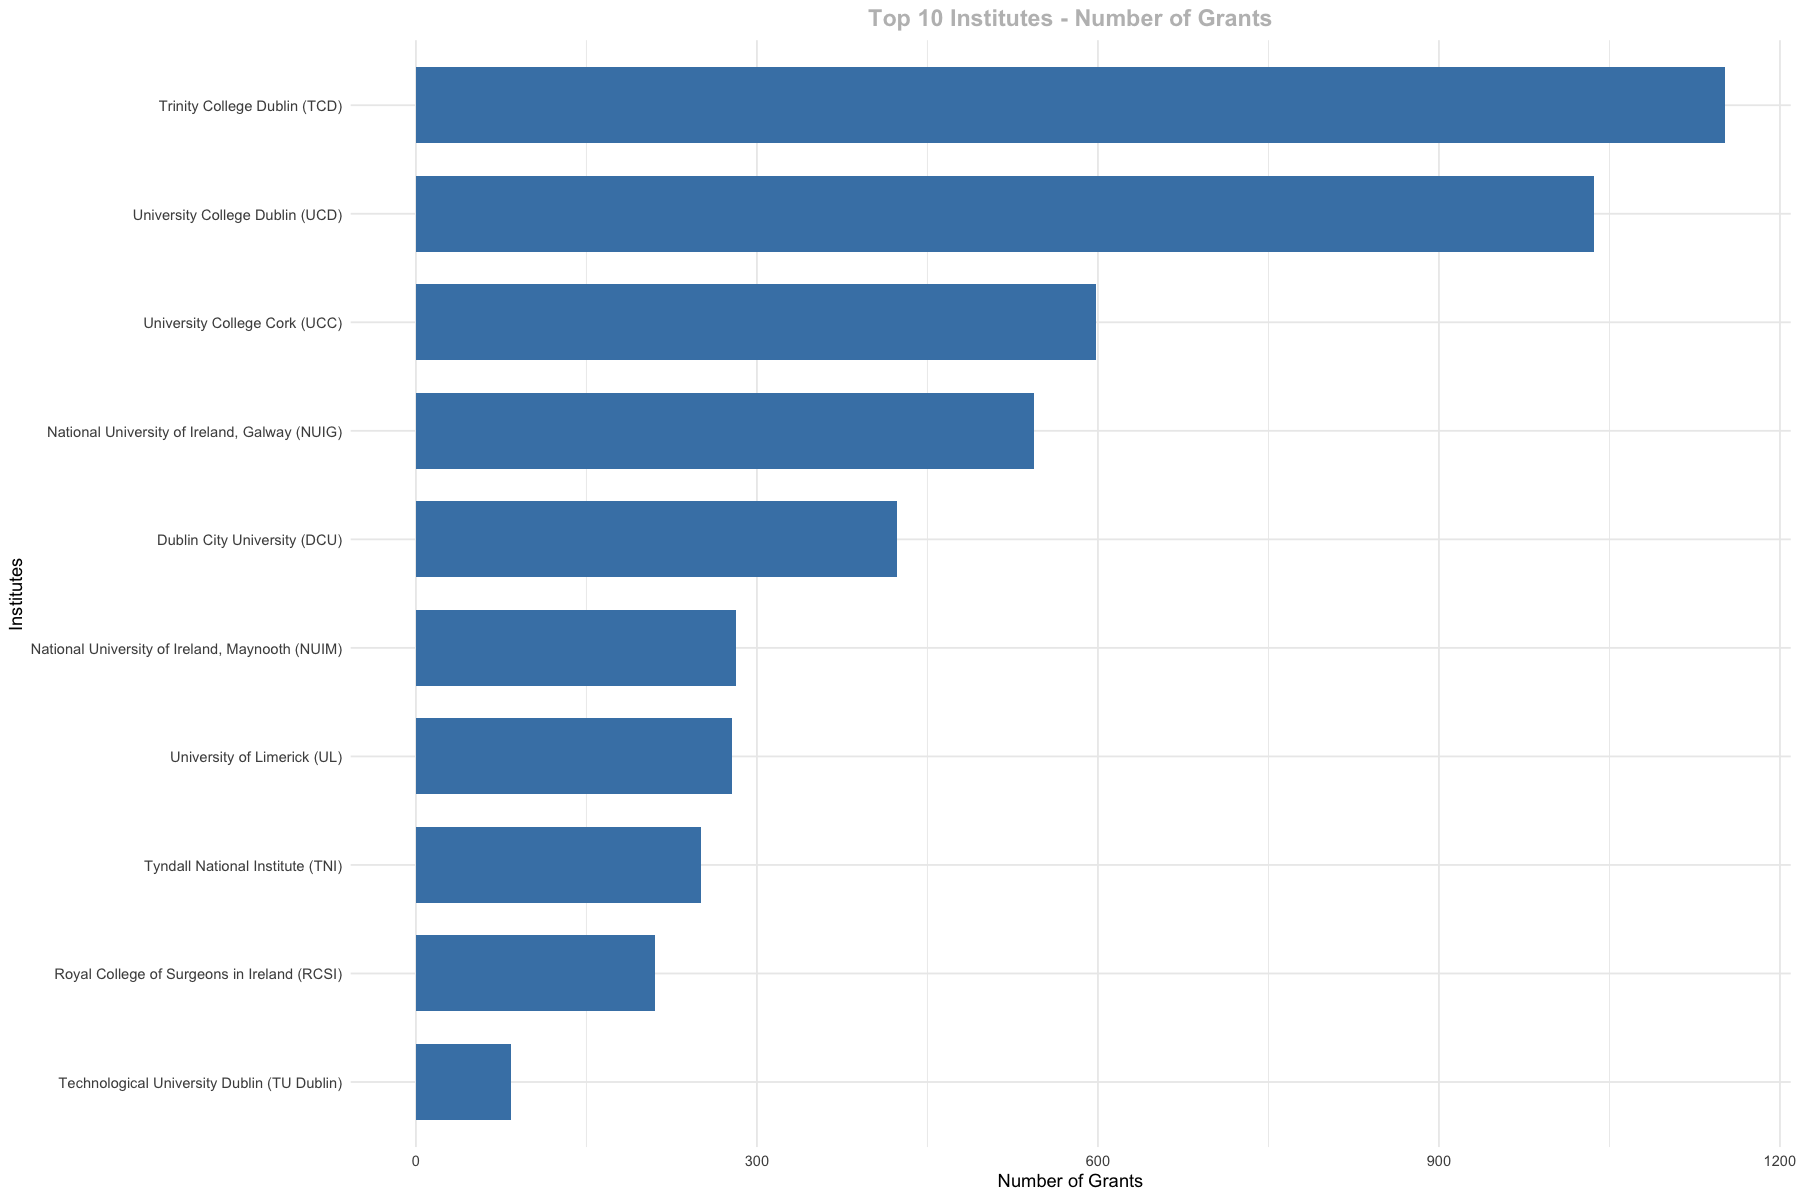

In [7]:
top10.institutes.total <- by_institute %>% arrange(desc(total)) %>% top_n(10)

top10.institutes.total %>% 
  ggplot( aes(x =reorder(as.factor(Research.Body), n), 
              y= n) ) +
  geom_bar(stat = "identity", width = .7, show.legend = TRUE, fill="steelblue") +
  ggtitle("Top 10 Institutes - Number of Grants") +
  theme_minimal() +
  xlab("Institutes") + 
  scale_y_continuous(name="Number of Grants") +
  theme(plot.title = element_text(color = "grey", size = 14, face = "bold", hjust = 0.5)) +
  coord_flip()

### Comparing number of Grants awarded Trinity College again is the winner. It received almost double of grants in numbers comparing to University College Cork.

In [9]:
# Grouping by Programmes and creating the sum, mean and total number of grants

by_programme <- sfi.new.grants %>% 
  group_by(Programme.Name) %>% 
  summarise(total = sum(Revised.Total.Commitment),
            mean = mean(Revised.Total.Commitment),
            n= n()) %>% ungroup()

`summarise()` ungrouping output (override with `.groups` argument)



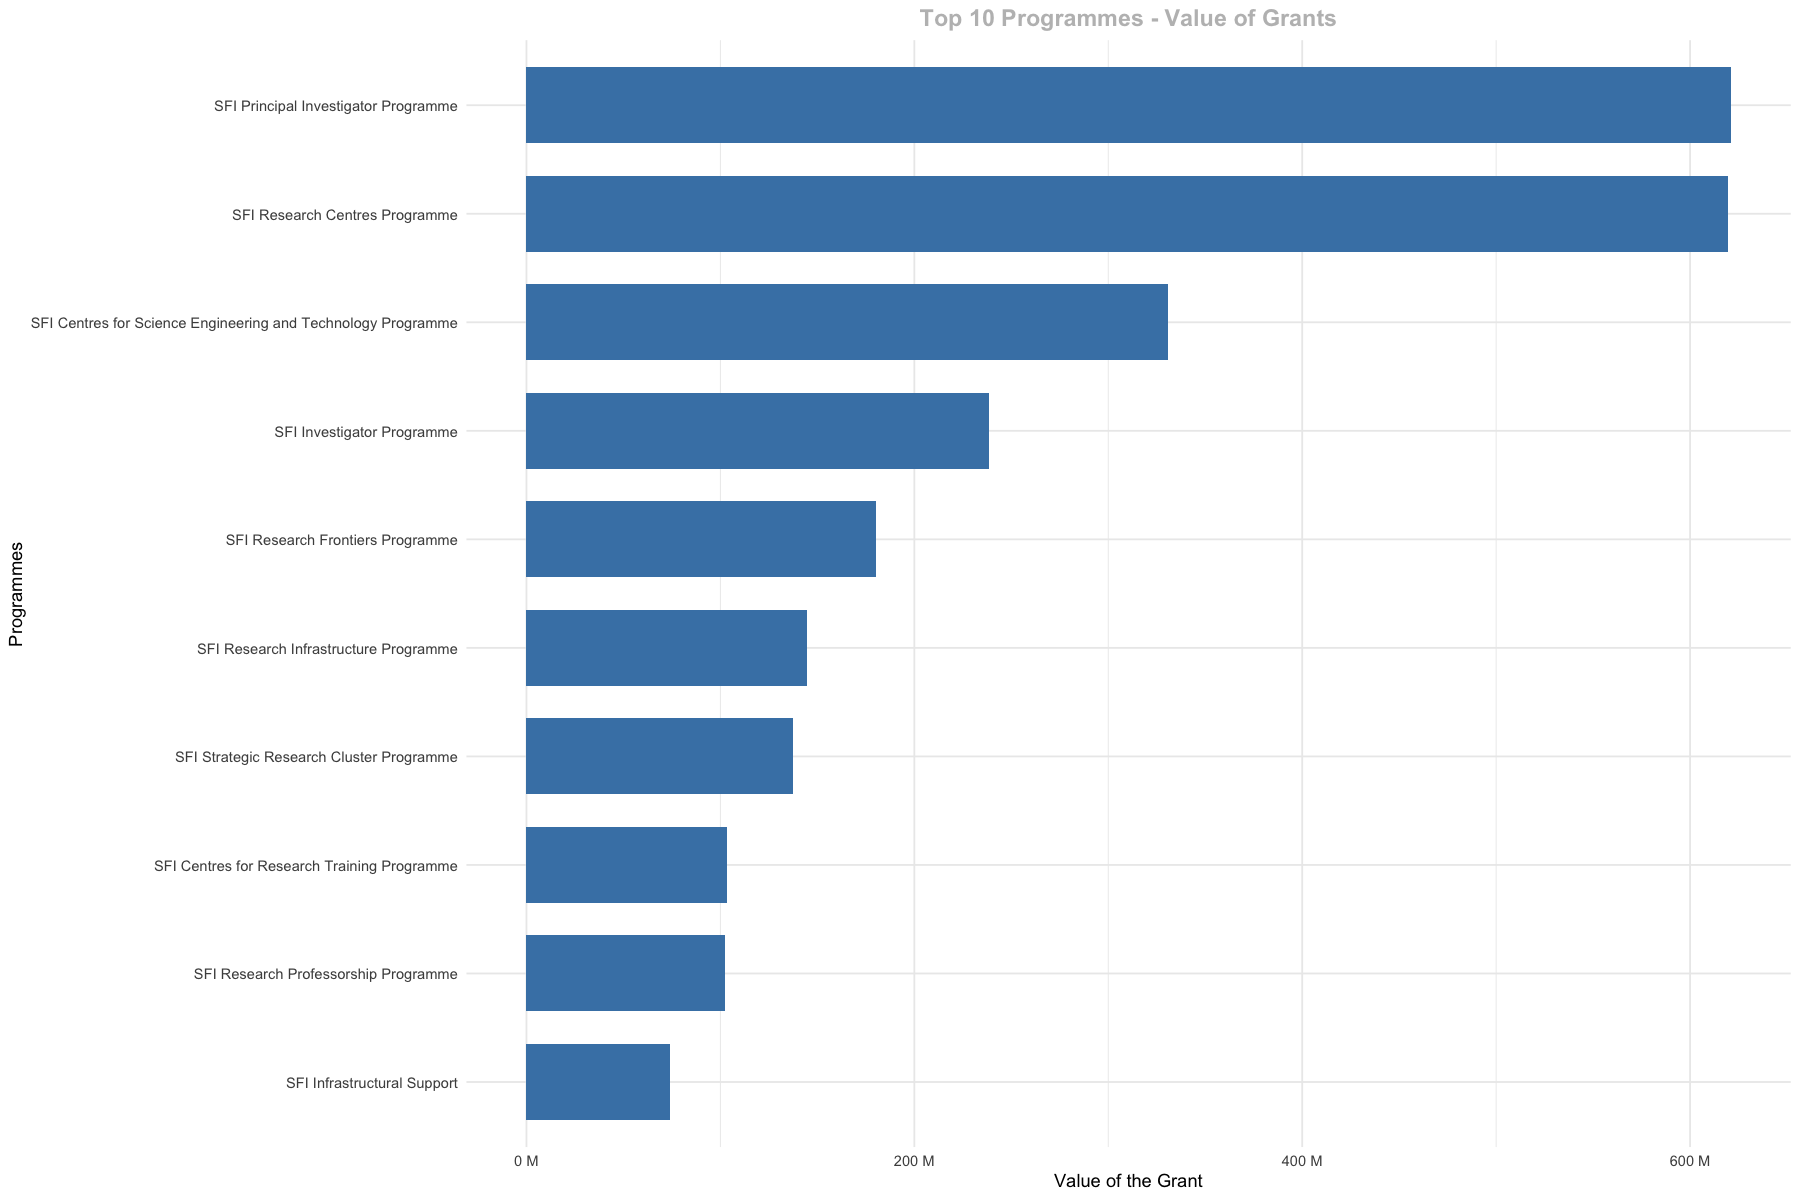

In [10]:
top10.programmes.value <- by_programme %>% arrange(desc(total)) %>% head(10)

top10.programmes.value %>% 
  ggplot( aes(x =reorder(as.factor(Programme.Name), total), 
              y= total) ) +
  geom_bar(stat = "identity", width = .7, show.legend = TRUE, fill="steelblue") +
  ggtitle("Top 10 Programmes - Value of Grants") +
  theme_minimal() +
  xlab("Programmes") + 
  scale_y_continuous(name="Value of the Grant", labels = unit_format(unit = "M", scale = 1e-6)) +
  theme(plot.title = element_text(color = "grey", size = 14, face = "bold", hjust = 0.5)) +
  coord_flip()

In [11]:
top10.programmes.value %>% head(2)

Programme.Name,total,mean,n
<chr>,<dbl>,<dbl>,<int>
SFI Principal Investigator Programme,620927756,1141411,544
SFI Research Centres Programme,619314958,7552621,82


### There are 2 most granted Programmes: <BR> SFI Principal Investigator Programme and SFI Research Centres Programme 
### Although SFI Principal Investigator Programme has the highest amount in grants, the amount granted to SFI Research Centres Programme is in average 7x higher than the amount granted to the SFI Principal Investigator Programme.

### Dataset 2 - SFI Gender Dashboard

In [12]:
# Data Exploration - Second Dataset (Grants by Gender)

sfi.grants.gender2 <- sfi.grants.gender
sfi.grants.gender2$Award.Status <- as.factor(sfi.grants.gender2$Award.Status)
sfi.grants.gender2$Applicant.Gender <- as.factor(sfi.grants.gender2$Applicant.Gender)

allMissing <- is.na(sfi.grants.gender2)
#get a count for each column
counts <- colSums(allMissing)

require(Hmisc)
require(psych, warn.conflicts = FALSE)

Hmisc::describe(sfi.grants.gender2)


sfi.grants.gender2 

 6  Variables      2778  Observations
--------------------------------------------------------------------------------
Programme.Name 
       n  missing distinct 
    2778        0       12 

lowest : SFI Career Development Award                                  SFI Future Research Leaders programme                         SFI Industry Fellowship                                       SFI Investigator Programme / Principal Investigator Programme SFI Investigator Project Award                               
highest: SFI Research Professorship                                    SFI Science Policy Research Programme                         SFI Spokes Fixed call Programme                               SFI Starting Investigator Research Grant                      SFI Technology Innovation Development Award                  
--------------------------------------------------------------------------------
Year 
       n  missing distinct     Info     Mean      Gmd 
    277

In [13]:
# By Gender
describeBy(sfi.grants.gender[,c("Amount.Requested", "Amount.funded")], sfi.grants.gender$Applicant.Gender)


 Descriptive statistics by group 
group: Female
                 vars   n     mean      sd median  trimmed    mad   min
Amount.Requested    1 719 614617.5 1677506  4e+05 392305.0 444780 10000
Amount.funded       2 213 546244.1 1824061  1e+05 279941.5  74130 10000
                      max    range  skew kurtosis       se
Amount.Requested 29870000 29860000 11.61   163.36  62560.4
Amount.funded    24250000 24240000 10.79   132.59 124982.6
------------------------------------------------------------ 
group: Male
                 vars    n    mean      sd median  trimmed    mad min      max
Amount.Requested    1 2000 1156305 3634810 430000 526062.5 489258   0 47940000
Amount.funded       2  592 1100039 3693443 310000 426940.9 340998   0 44440000
                    range skew kurtosis        se
Amount.Requested 47940000 7.20    58.48  81276.83
Amount.funded    44440000 7.04    56.67 151799.59

### As expected the number of Male Applicants is way higher than Female ones. But a interesting insight is that Male Applicants on average request almost the double amount for their grants than the Female Applicants.
#### Mean Amount Requested (Male) - 1.156.305,00 <BR> Mean Amount Requested (Female) - 614.617,50

`summarise()` regrouping output by 'Year' (override with `.groups` argument)



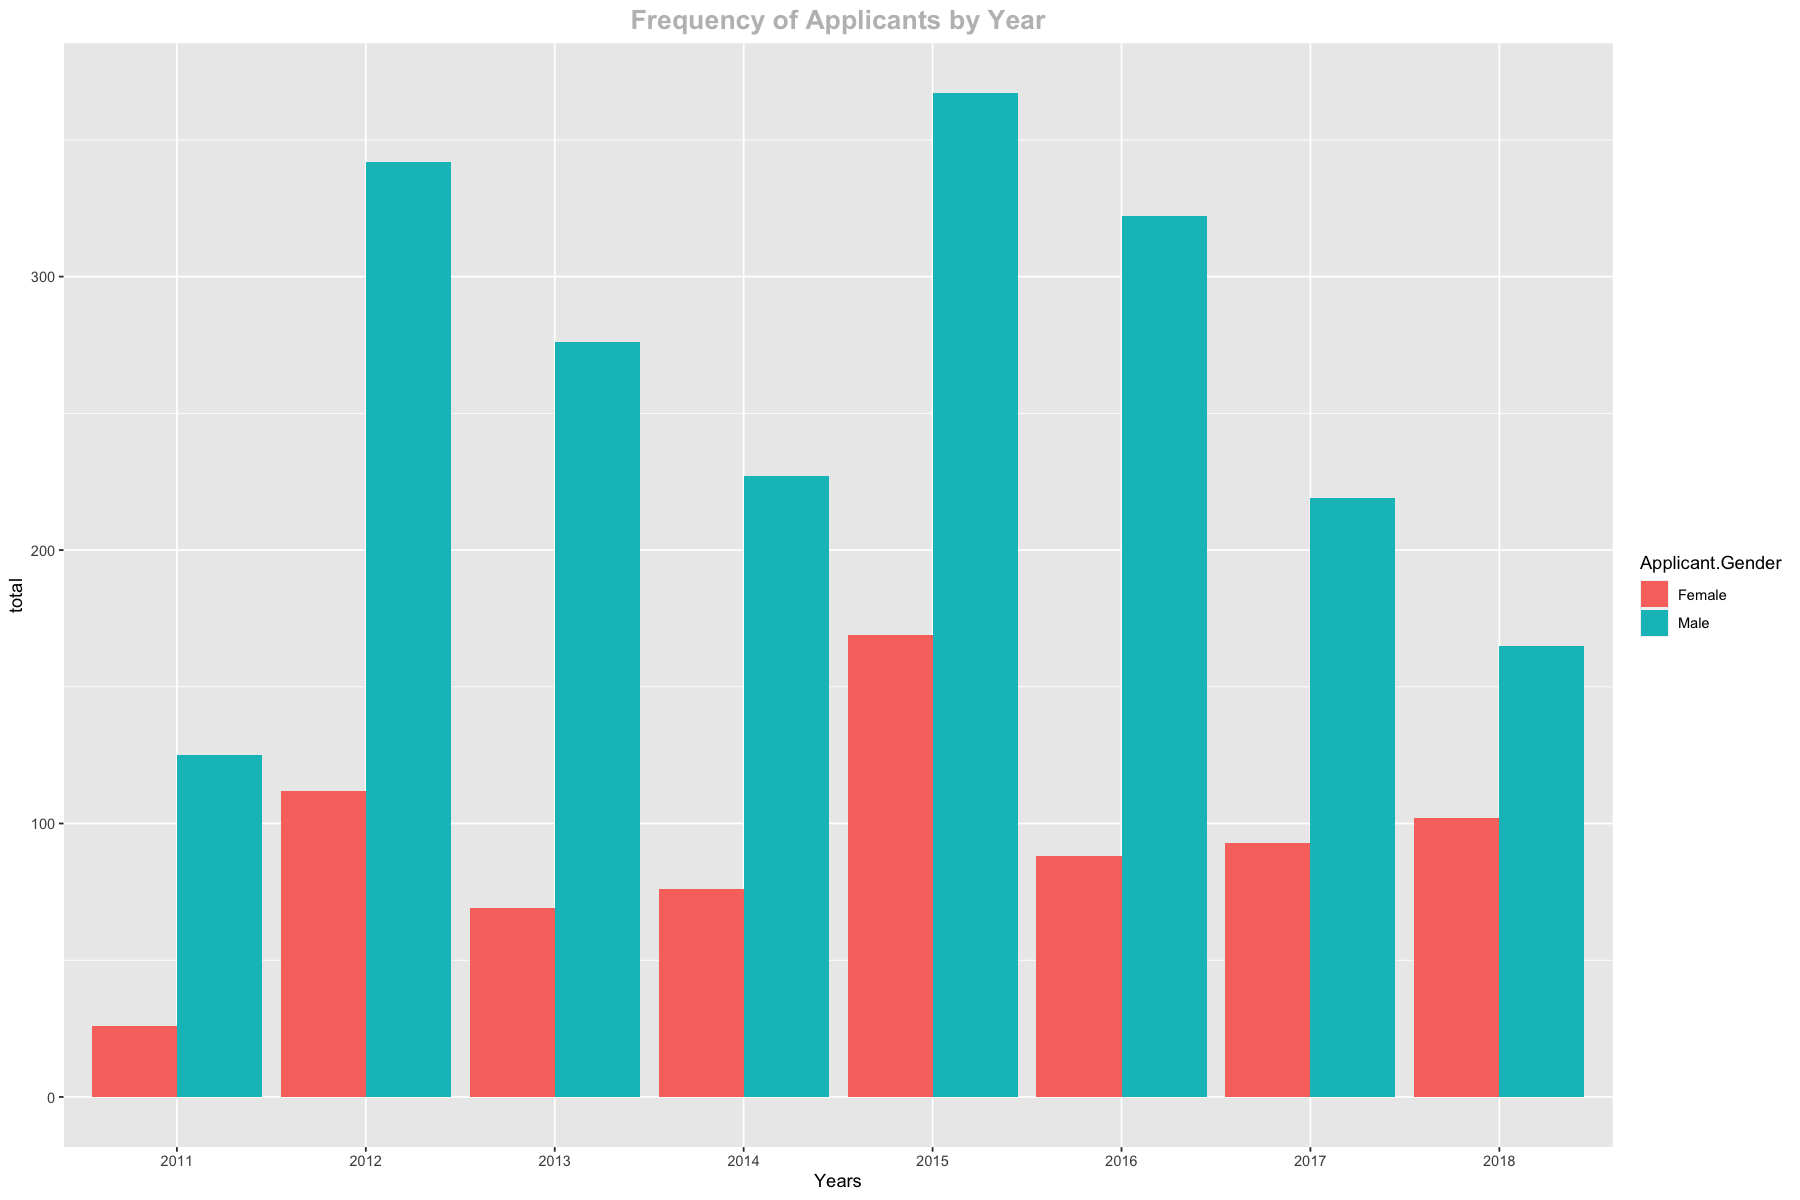

In [14]:
# How many applications were submitted each year by Gender?
total.by.year <- sfi.grants.gender2 %>% 
  group_by(Year, Applicant.Gender) %>% 
  summarise(total = n())

total.by.year %>% ggplot( aes(fill=Applicant.Gender, y=total, x=as.factor(Year))) + 
  geom_bar(stat="identity", position="dodge") +
  ggtitle("Frequency of Applicants by Year") +
  theme(plot.title = element_text(color = "grey", size = 16, face = "bold", hjust = 0.5)) +
  xlab("Years")

### After reached a peak in number of grants in 2015 we can see a decreasing in the coming years. <br> After a search online, on 2015, SFI made a report saying that a decline in the number of PhD graduates in STEM research has occurred which may lead to a skills deficit in future years. (https://www.sfi.ie/research-news/publications/annual-reports/Annual-report-2015.pdf)

### The data shows us that the prediction has happened indeed.

In [15]:
# Proportion of accepted and denied applications by gender
require(gmodels)
CrossTable(sfi.grants.gender2$Applicant.Gender, sfi.grants.gender2$Award.Status,
          prop.r=TRUE,
          prop.c=FALSE,
          prop.t=FALSE,
          prop.chisq=FALSE,
          digits=2)

Loading required package: gmodels




 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|-------------------------|

 
Total Observations in Table:  2778 

 
                                    | sfi.grants.gender2$Award.Status 
sfi.grants.gender2$Applicant.Gender |   Awarded |  Declined | Row Total | 
------------------------------------|-----------|-----------|-----------|
                             Female |       214 |       521 |       735 | 
                                    |      0.29 |      0.71 |      0.26 | 
------------------------------------|-----------|-----------|-----------|
                               Male |       590 |      1453 |      2043 | 
                                    |      0.29 |      0.71 |      0.74 | 
------------------------------------|-----------|-----------|-----------|
                       Column Total |       804 |      1974 |      2778 | 
------------------------------------|-----------|-----------|-----------|

 


### The proportion of Awarded/Declined Grants is the same for both genders. <Br> 29% Awarded | 71% Declined

In [16]:
# Chi-squared test for variables Gender and Award Status
status.gender.table <- table(sfi.grants.gender2$Applicant.Gender, sfi.grants.gender2$Award.Status)
chisq.test(status.gender.table)


	Pearson's Chi-squared test with Yates' continuity correction

data:  status.gender.table
X-squared = 0.0054536, df = 1, p-value = 0.9411


### After applying the Chi-squared test we can conclude that probably the two variables (Gender and Award Status) are independents of each other, therefore, there is no relationship between them.

In [17]:
# By Award Status
describeBy(sfi.grants.gender[,c("Amount.Requested", "Amount.funded")], sfi.grants.gender$Award.Status)


 Descriptive statistics by group 
group: Awarded
                 vars   n      mean      sd median  trimmed    mad   min
Amount.Requested    1 804 1024701.5 3616477 265000 405993.8 289107 10000
Amount.funded       2 801  954360.8 3319078 240000 383666.2 266868  3000
                      max    range skew kurtosis       se
Amount.Requested 47940000 47930000 7.78    68.92 127543.3
Amount.funded    44440000 44437000 7.73    68.96 117273.9
------------------------------------------------------------ 
group: Declined
                 vars    n    mean      sd median  trimmed    mad min      max
Amount.Requested    1 1915 1008178 3073772 440000 521161.1 504084   0 45380000
Amount.funded       2    4  782500  895484 655000 782500.0 919212   0  1820000
                    range skew kurtosis        se
Amount.Requested 45380000 7.98    72.19  70240.45
Amount.funded     1820000 0.13    -2.29 447742.02

### Analysing the statistics resulted from the Amount Requested and Funded by Award status we can see that the average difference between Requested and Funded in Grants Awarded is not high. <BR> Mean Requested - 1.024.701,5 and Mean Funded 954.360,8

In [18]:
# Relationship between Amount Requested x Status (Awarded/Declined)

amount.requested.clean <- filter(sfi.grants.gender2, !is.na(Amount.Requested))

# Creating a category based on quantile to categorize the Amount Requested
total.amount.requested <- amount.requested.clean %>%
  mutate(Category.Amount=cut(Amount.Requested, 
                             breaks=quantile(Amount.Requested, c(0,.25,.50,.75,1), na.rm = TRUE), 
                             labels=c("low","medium","high","very-high")))

total.amount.requested %>% group_by(Category.Amount) %>% summarise(total= n()) %>% ungroup()


`summarise()` ungrouping output (override with `.groups` argument)



Category.Amount,total
<fct>,<int>
low,799
medium,625
high,618
very-high,674
NA,3


In [19]:
CrossTable(total.amount.requested$Award.Status, total.amount.requested$Category.Amount,
          prop.r=TRUE,
          prop.c=FALSE,
          prop.t=FALSE,
          prop.chisq=FALSE,
          digits=2)


 
   Cell Contents
|-------------------------|
|                       N |
|           N / Row Total |
|-------------------------|

 
Total Observations in Table:  2716 

 
                                    | total.amount.requested$Category.Amount 
total.amount.requested$Award.Status |       low |    medium |      high | very-high | Row Total | 
------------------------------------|-----------|-----------|-----------|-----------|-----------|
                            Awarded |       364 |       133 |       121 |       186 |       804 | 
                                    |      0.45 |      0.17 |      0.15 |      0.23 |      0.30 | 
------------------------------------|-----------|-----------|-----------|-----------|-----------|
                           Declined |       435 |       492 |       497 |       488 |      1912 | 
                                    |      0.23 |      0.26 |      0.26 |      0.26 |      0.70 | 
------------------------------------|-----------|--------

### 45% of the Applicants who have their requested Grants Awarded have applied for a "Low" amount.
### Below there is a graph which represents the total of awarded/declined by categories

`summarise()` regrouping output by 'Category.Amount' (override with `.groups` argument)



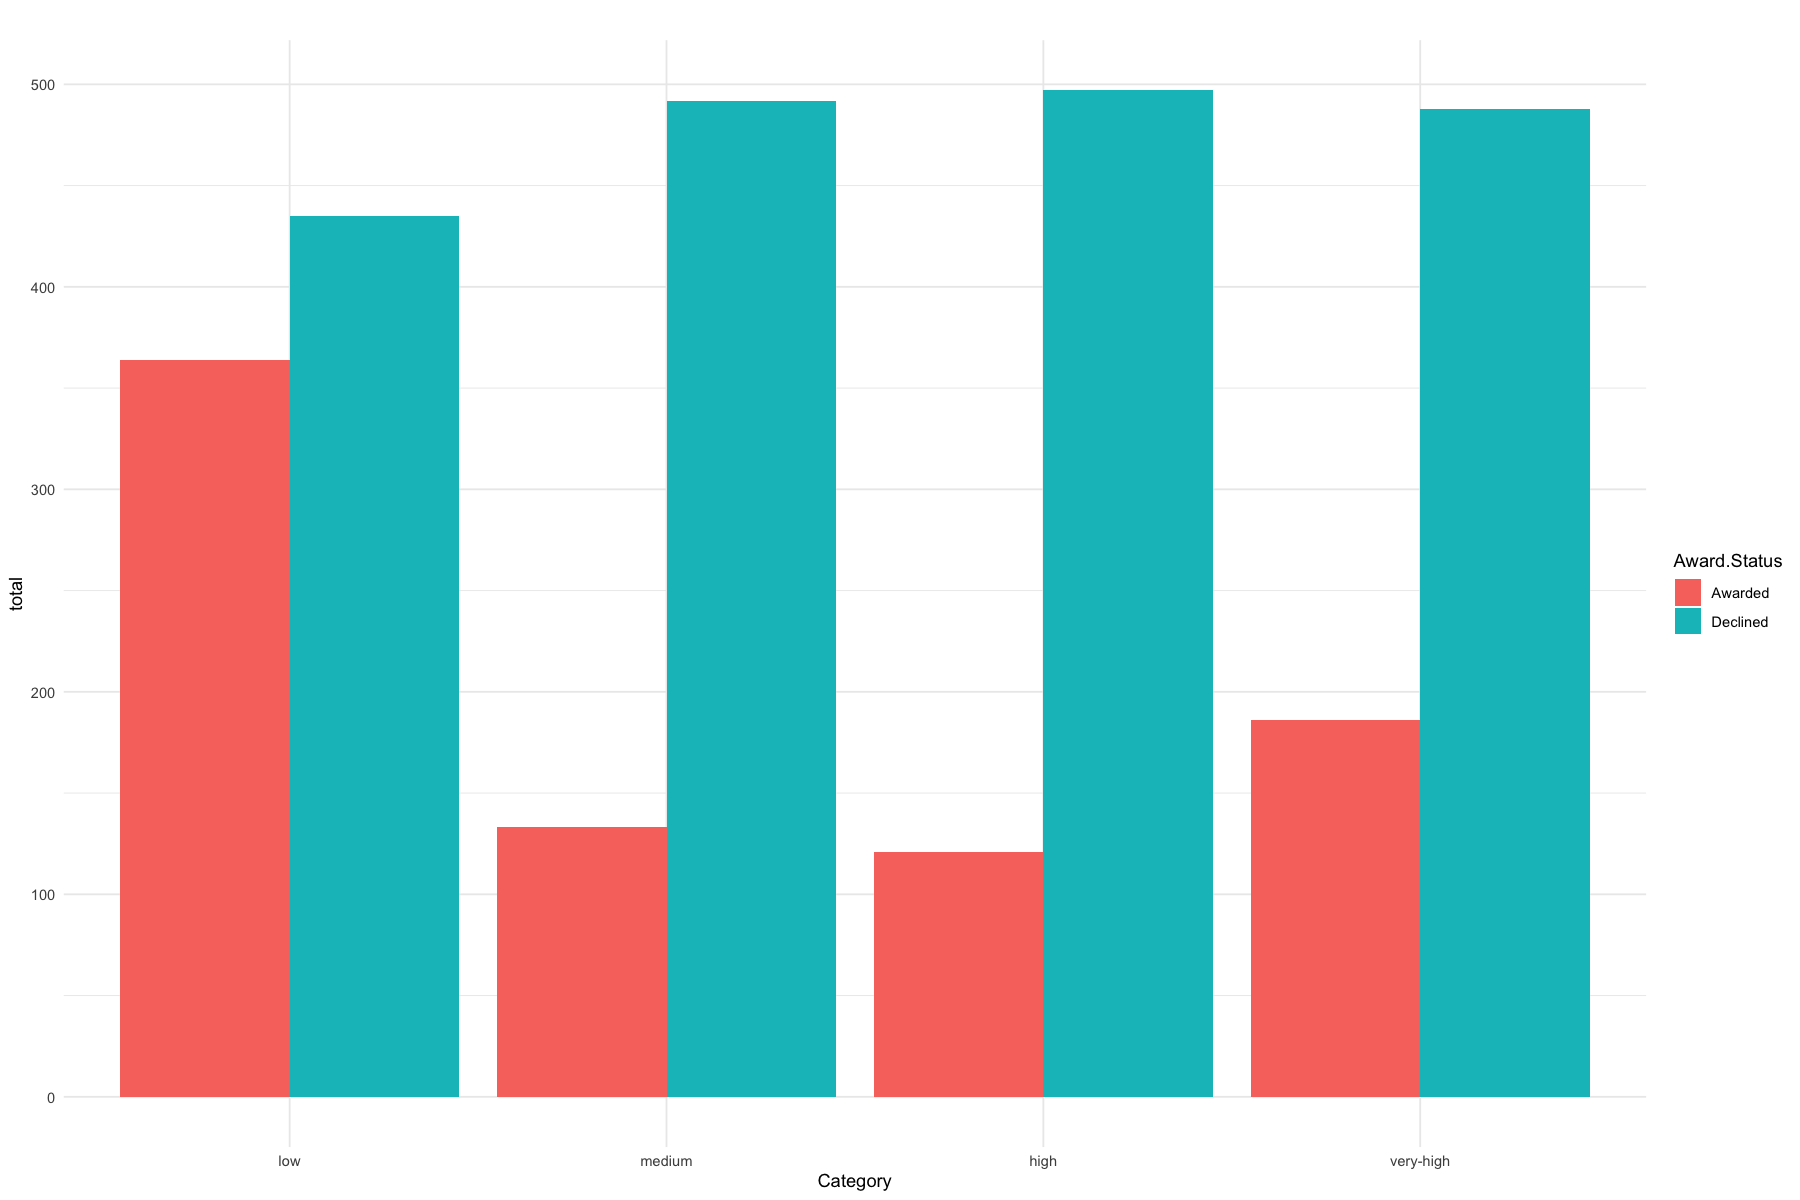

In [20]:
# Plot the total of awarded/declined by categories
categories.amount <- total.amount.requested %>%
  group_by(Category.Amount, Award.Status) %>%
  filter(!is.na(Category.Amount)) %>%
  summarise(total = n())

categories.amount %>% ggplot( aes(fill=Award.Status, y=total, x=as.factor(Category.Amount))) + 
  geom_bar(position="dodge", stat="identity") +
  ggtitle("") +
  theme_minimal() +
  theme(plot.title = element_text(color = "grey", size = 14, face = "bold", hjust = 0.5)) +
  xlab("Category")

In [21]:
R.version

               _                           
platform       x86_64-apple-darwin17.0     
arch           x86_64                      
os             darwin17.0                  
system         x86_64, darwin17.0          
status                                     
major          4                           
minor          0.2                         
year           2020                        
month          06                          
day            22                          
svn rev        78730                       
language       R                           
version.string R version 4.0.2 (2020-06-22)
nickname       Taking Off Again            